In [ ]:
# Data Exploration - Premier League 2024-2025

Notebook này thực hiện khám phá và tiền xử lý dữ liệu Premier League 2024-2025.

## Mục tiêu:
1. Load và kiểm tra dữ liệu
2. Phân tích missing values
3. Thống kê mô tả
4. Feature engineering
5. Chuẩn bị dữ liệu cho các phân tích tiếp theo


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
import os

# Thêm thư mục src vào path
sys.path.append('../src')

from data_preprocessing import (
    load_data, explore_data, get_numeric_columns, 
    get_categorical_columns, feature_engineering_players,
    feature_engineering_teams, prepare_data_for_analysis
)

warnings.filterwarnings('ignore')

# Cấu hình hiển thị
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Đã import các thư viện và modules cần thiết")


✅ Đã import các thư viện và modules cần thiết


## 1. Load dữ liệu


In [2]:
# Load tất cả dữ liệu
data = load_data()

print("📊 Dữ liệu đã được load:")
for name, df in data.items():
    print(f"  - {name}: {df.shape[0]} rows, {df.shape[1]} columns")

# Lưu vào biến riêng để dễ sử dụng
players_df = data['players']
keepers_df = data['keepers']
teams_for_df = data['teams_for']
teams_vs_df = data['teams_vs']


📊 Dữ liệu đã được load:
  - players: 574 rows, 138 columns
  - keepers: 44 rows, 51 columns
  - teams_for: 20 rows, 18 columns
  - teams_vs: 20 rows, 27 columns


## 2. Khám phá dữ liệu cầu thủ (Players)


In [3]:
# Khám phá dữ liệu cầu thủ
missing_players = explore_data(players_df, "Players Dataset")

print("\n" + "="*60)
print("SAMPLE DATA - First 3 rows:")
print("="*60)
print(players_df.head(3))

print("\n" + "="*60)
print("COLUMN NAMES:")
print("="*60)
print(f"Total columns: {len(players_df.columns)}")
print("\nFirst 20 columns:")
print(players_df.columns[:20].tolist())



EXPLORING: Players Dataset
Shape: 574 rows, 138 columns

Missing values:
      Missing Count  Percentage
Born              1    0.174216

Data types:
int64      102
float64     32
object       4
Name: count, dtype: int64

SAMPLE DATA - First 3 rows:
              Player Nation Pos        Squad  Age    Born  90s_shooting  \
0    Aaron Cresswell    ENG  DF     West Ham   34  1989.0           9.2   
1     Aaron Ramsdale    ENG  GK  Southampton   26  1998.0          30.0   
2  Aaron Wan-Bissaka    COD  DF     West Ham   26  1997.0          35.0   

   shooting_Standard_Gls  shooting_Standard_Sh  shooting_Standard_SoT  \
0                      0                     5                      0   
1                      0                     0                      0   
2                      2                    16                      5   

   shooting_Standard_SoT%  shooting_Standard_Sh/90  shooting_Standard_SoT/90  \
0                     0.0                     0.55                      0.0

In [4]:
# Thống kê mô tả cho các cột số quan trọng
numeric_cols = get_numeric_columns(players_df, exclude_cols=['Age', 'Born'])

# Chọn một số cột quan trọng để xem
important_cols = [col for col in numeric_cols if any(keyword in col.lower() 
    for keyword in ['gls', 'ast', 'xg', 'xa', 'sh', 'sot', 'pass', 'tkl', 'touches'])]

if len(important_cols) > 0:
    print("📈 Thống kê mô tả - Các chỉ số quan trọng:")
    print(players_df[important_cols[:15]].describe())


📈 Thống kê mô tả - Các chỉ số quan trọng:
       90s_shooting  shooting_Standard_Gls  shooting_Standard_Sh  \
count    574.000000             574.000000            574.000000   
mean      14.535366               1.885017             17.015679   
std       11.707284               3.537979             21.769972   
min        0.000000               0.000000              0.000000   
25%        3.700000               0.000000              1.000000   
50%       12.250000               0.000000              9.500000   
75%       24.500000               2.000000             24.000000   
max       38.000000              29.000000            125.000000   

       shooting_Standard_SoT  shooting_Standard_SoT%  shooting_Standard_Sh/90  \
count             574.000000              574.000000               574.000000   
mean                5.722997               24.933972                 1.411463   
std                 8.487847               22.935453                 4.010010   
min                 0

📊 Phân bố vị trí cầu thủ:
Pos
DF    209
MF    169
FW    152
GK     44
Name: count, dtype: int64


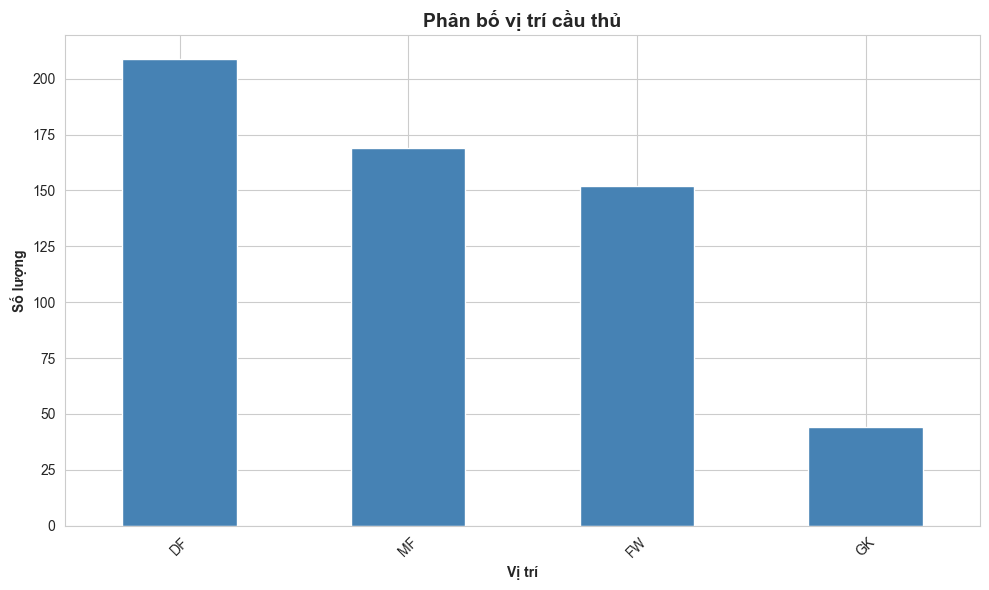

In [5]:
# Phân tích vị trí cầu thủ
if 'Pos' in players_df.columns:
    print("📊 Phân bố vị trí cầu thủ:")
    print(players_df['Pos'].value_counts())
    
    plt.figure(figsize=(10, 6))
    players_df['Pos'].value_counts().plot(kind='bar', color='steelblue')
    plt.title('Phân bố vị trí cầu thủ', fontsize=14, fontweight='bold')
    plt.xlabel('Vị trí', fontweight='bold')
    plt.ylabel('Số lượng', fontweight='bold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('../results/position_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()


## 3. Khám phá dữ liệu đội bóng (Teams)


In [6]:
# Khám phá dữ liệu đội bóng
explore_data(teams_for_df, "Teams For Dataset")
explore_data(teams_vs_df, "Teams VS Dataset")

print("\n" + "="*60)
print("TEAMS FOR - Sample:")
print("="*60)
print(teams_for_df.head())

print("\n" + "="*60)
print("TEAMS VS - Sample:")
print("="*60)
print(teams_vs_df.head())



EXPLORING: Teams For Dataset
Shape: 20 rows, 18 columns

Missing values:
No missing values!

Data types:
int64      12
float64     5
object      1
Name: count, dtype: int64

EXPLORING: Teams VS Dataset
Shape: 20 rows, 27 columns

Missing values:
No missing values!

Data types:
int64      16
float64    10
object      1
Name: count, dtype: int64

TEAMS FOR - Sample:
             Squad  MP   W   D   L  GF  GA  GD  Pts  Pts/MP    xG   xGA   xGD  \
0        Liverpool  38  25   9   4  86  41  45   84    2.21  82.2  38.6  43.6   
1          Arsenal  38  20  14   4  69  34  35   74    1.95  59.9  34.4  25.5   
2  Manchester City  38  21   8   9  72  44  28   71    1.87  68.1  47.7  20.4   
3          Chelsea  38  20   9   9  64  43  21   69    1.82  67.8  47.3  20.5   
4    Newcastle Utd  38  20   6  12  68  47  21   66    1.74  63.8  45.5  18.3   

   xGD/90  Attendance  Top Team Scorer  Goalkeeper  Notes  
0    1.15       60324                0           0      0  
1    0.67       60251    

## 4. Feature Engineering


In [7]:
# Tạo các features mới cho cầu thủ
players_df_enhanced = feature_engineering_players(players_df)

print("✅ Đã tạo các features mới cho cầu thủ")
print(f"\nSố cột trước: {len(players_df.columns)}")
print(f"Số cột sau: {len(players_df_enhanced.columns)}")
print(f"\nCác cột mới được thêm:")
new_cols = set(players_df_enhanced.columns) - set(players_df.columns)
print(list(new_cols))


✅ Đã tạo các features mới cho cầu thủ

Số cột trước: 138
Số cột sau: 146

Các cột mới được thêm:
['Total_Defense_Contribution', 'xG_per_90', 'xA_per_90', 'Goals_per_90', 'Total_Attack_Contribution', 'Assists_per_90', 'Assist_Efficiency', 'Finishing_Efficiency']


In [8]:
# Tạo các features mới cho đội bóng
teams_merged = feature_engineering_teams(teams_for_df, teams_vs_df)

if teams_merged is not None:
    print("✅ Đã merge và tạo features mới cho đội bóng")
    print(f"\nShape: {teams_merged.shape}")
    print("\nSample data:")
    print(teams_merged.head())


✅ Đã merge và tạo features mới cho đội bóng

Shape: (20, 44)

Sample data:
             Squad  MP   W   D   L  GF  GA  GD  Pts  Pts/MP    xG   xGA   xGD  \
0        Liverpool  38  25   9   4  86  41  45   84    2.21  82.2  38.6  43.6   
1          Arsenal  38  20  14   4  69  34  35   74    1.95  59.9  34.4  25.5   
2  Manchester City  38  21   8   9  72  44  28   71    1.87  68.1  47.7  20.4   
3          Chelsea  38  20   9   9  64  43  21   69    1.82  67.8  47.3  20.5   
4    Newcastle Utd  38  20   6  12  68  47  21   66    1.74  63.8  45.5  18.3   

   xGD/90  Attendance  Top Team Scorer  Goalkeeper  Notes  Home_MP  Home_W  \
0    1.15       60324                0           0      0       19      14   
1    0.67       60251                0           0      0       19      11   
2    0.54       52756                0           0      0       19      13   
3    0.54       39672                0           0      0       19      12   
4    0.48       52187                0          

## 5. Lưu dữ liệu đã xử lý


In [9]:
# Chuẩn bị dữ liệu cho phân tích
players_processed = prepare_data_for_analysis(players_df_enhanced)

# Lưu dữ liệu đã xử lý
players_processed.to_excel('../data/players_processed.xlsx', index=False)
print("✅ Đã lưu players_processed.xlsx")

if teams_merged is not None:
    teams_processed = prepare_data_for_analysis(teams_merged, target_cols=['Squad'])
    teams_processed.to_excel('../data/teams_processed.xlsx', index=False)
    print("✅ Đã lưu teams_processed.xlsx")

print("\n🎉 Hoàn tất khám phá dữ liệu!")


✅ Đã lưu players_processed.xlsx
✅ Đã lưu teams_processed.xlsx

🎉 Hoàn tất khám phá dữ liệu!
